In [10]:
import tensorflow as tf

import math
import libs

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [11]:
plt.style.use("fivethirtyeight")


# Get stock quote
df = web.DataReader("AAPL", data_source="yahoo", start="2000-01-01", end="2020-12-31")

# df.to_csv("AAPL.csv")

# Read from csv
# must tell pd to parse dates
# https://stackoverflow.com/questions/17465045/can-pandas-automatically-recognize-dates
# df = pd.read_csv("AAPL.csv", parse_dates=["Date"], index_col=["Date"])
# must set index as it reads from csv, index_col worked, no idea why set_index did not
# df.set_index("Date")
# print(type(df["Date"][1]))

In [12]:
print("df.shape", df.shape)

df.shape (5196, 6)


In [13]:
print(df)

                  High         Low        Open       Close       Volume  \
Date                                                                      
1999-12-31    3.674107    3.553571    3.604911    3.671875   40952800.0   
2000-01-03    4.017857    3.631696    3.745536    3.997768  133949200.0   
2000-01-04    3.950893    3.613839    3.866071    3.660714  128094400.0   
2000-01-05    3.948661    3.678571    3.705357    3.714286  194580400.0   
2000-01-06    3.821429    3.392857    3.790179    3.392857  191993200.0   
...                ...         ...         ...         ...          ...   
2020-08-19  468.649994  462.440002  463.929993  462.829987   36384500.0   
2020-08-20  473.570007  462.929993  463.000000  473.100006   31726800.0   
2020-08-21  499.470001  477.000000  477.049988  497.480011   84513700.0   
2020-08-24  515.140015  495.750000  514.789978  503.429993   86484400.0   
2020-08-25  500.720001  492.209991  498.790009  499.299988   52776900.0   

             Adj Close  

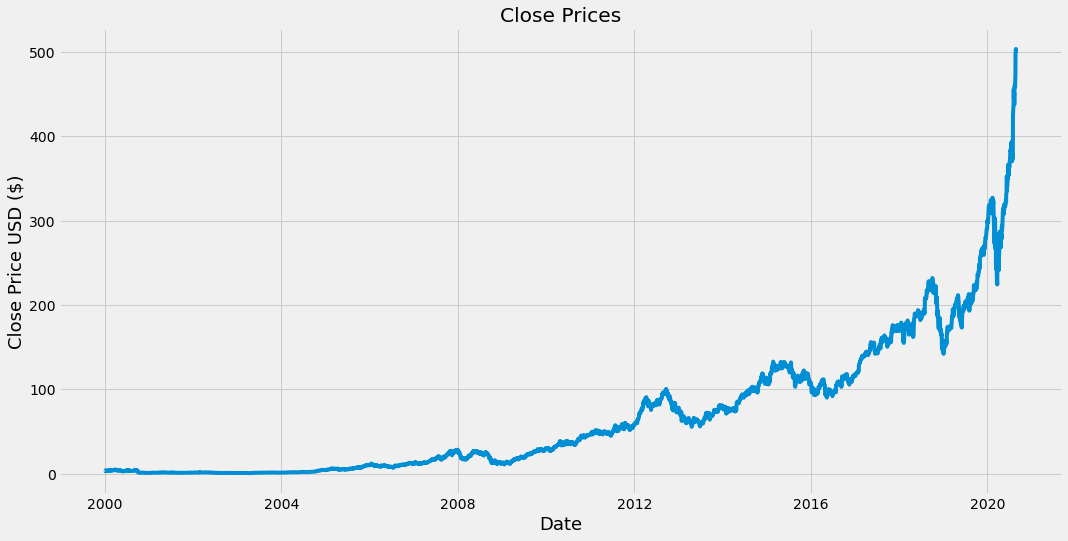

In [14]:
plt.figure(figsize=(16, 8))
plt.title("Close Prices")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [15]:
# Create a new df with only Closing prices
# Convert dataframe to numpy array
close_prices = df.filter(["Close"])
data = close_prices.values

In [16]:
close_prices

,Close
Date,
1999-12-31,3.671875
2000-01-03,3.997768
2000-01-04,3.660714
2000-01-05,3.714286
2000-01-06,3.392857
...,...
2020-08-19,462.829987
2020-08-20,473.100006
2020-08-21,497.480011


In [17]:
data

array([[  3.671875  ],
       [  3.99776793],
       [  3.66071439],
       ...,
       [497.48001099],
       [503.42999268],
       [499.29998779]])

In [18]:
train_len = math.ceil(len(data)*0.8)

In [19]:
train_len #5194*0.8

4157

In [20]:
test_len = len(data) - train_len

In [21]:
test_len

1039

In [22]:
scaler = MinMaxScaler(feature_range=(0, 1)) #change data to [0;1]. Method: (all points - min)/(max-min)

In [23]:
scaler

MinMaxScaler()

In [24]:
scaled_data = scaler.fit_transform(data)

In [25]:
scaled_data

array([[0.00544233],
       [0.00609088],
       [0.00542012],
       ...,
       [0.98815907],
       [1.        ],
       [0.99178097]])

In [31]:
train_data = scaled_data[:train_len, :]

In [32]:
train_data

array([[0.00544233],
       [0.00609088],
       [0.00542012],
       ...,
       [0.18906311],
       [0.19053576],
       [0.19113279]])